<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier González Paredes</h3></center>

<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 
 <center><h3>https://github.com/JavierGonzalezP/EIE_401_MULTIMEDIA</h3></center>

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


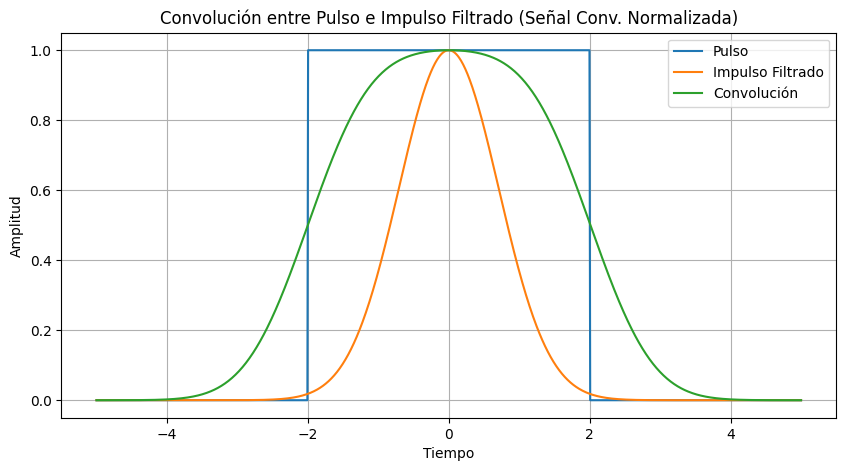

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función de pulso
def pulso(t):
    return np.where(np.logical_and(t >= -2, t <= 2), 1, 0)

# Función de impulso filtrado
def impulso_filtrado(t):
    return np.exp(-t**2)

# Función de convolución
def convolucion(x, h):
    conv = np.convolve(x, h, mode='same')
    return conv / np.max(np.abs(conv)) # Se normaliza la señal convolucionada

# Rango de la variable independiente
t = np.linspace(-5, 5, 1000) # Se utiliza el mismo rango para ambas funciones

# Se calcula las señales de pulso y de impulso filtrado
x = pulso(t)
h = impulso_filtrado(t)

# Se realiza la convolución entre las señales y normalizarla
y = convolucion(x, h)

# Se grafica las señales y la convolución
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Pulso')
plt.plot(t, h, label='Impulso Filtrado')
plt.plot(t, y, label='Convolución')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Convolución entre Pulso e Impulso Filtrado (Señal Conv. Normalizada)')
plt.legend()
plt.grid(True)
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


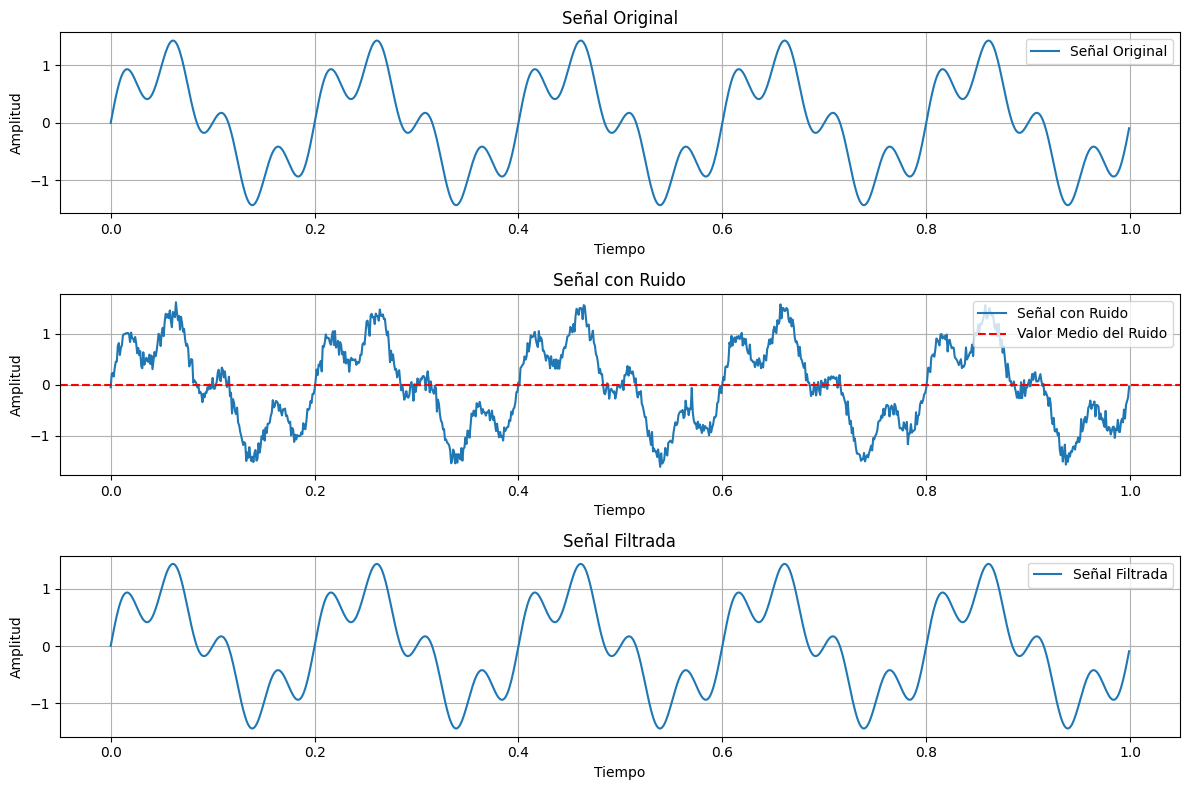

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Se genera señal original
def generar_senial_original(tiempo):
    return np.sin(2 * np.pi * 5 * tiempo) + 0.5 * np.sin(2 * np.pi * 20 * tiempo)

# Paso 2: Se agrega ruido gaussiano a la señal original
def agregar_ruido(senial, mean=0, std=0.1):
    ruido = np.random.normal(mean, std, senial.shape)
    return senial + ruido

# Paso 3: Se calcula el valor medio de la señal con ruido
def calcular_valor_medio(senial_ruidosa):
    return np.mean(senial_ruidosa)

# Paso 4: Se aplica transformada de Fourier a la señal con ruido
def aplicar_fft(senial_ruidosa):
    return np.fft.fft(senial_ruidosa)

# Paso 5: Se filtra frecuencias no deseadas
def filtrar_frecuencias(fft_senial, umbral):
    fft_filtrada = np.copy(fft_senial)
    fft_filtrada[np.abs(fft_filtrada) < umbral] = 0
    return fft_filtrada

# Paso 6: Se aplica la transformada inversa de Fourier para obtener la señal filtrada
def aplicar_ifft(fft_filtrada):
    return np.fft.ifft(fft_filtrada)

# Parámetros
fs = 1000
tiempo = np.arange(0, 1, 1/fs)
senal_original = generar_senial_original(tiempo)
senal_ruidosa = agregar_ruido(senal_original)
umbral_filtrado = 0.1 * np.max(np.abs(aplicar_fft(senal_ruidosa)))

# Proceso de denoising
valor_medio_ruido = calcular_valor_medio(senal_ruidosa)
fft_senal_ruidosa = aplicar_fft(senal_ruidosa)
fft_filtrada = filtrar_frecuencias(fft_senal_ruidosa, umbral_filtrado)
senal_filtrada = aplicar_ifft(fft_filtrada).real

# Se grafica los resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(tiempo, senal_original, label='Señal Original')
plt.title('Señal Original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(tiempo, senal_ruidosa, label='Señal con Ruido')
plt.axhline(valor_medio_ruido, color='r', linestyle='--', label='Valor Medio del Ruido')
plt.title('Señal con Ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(tiempo, senal_filtrada, label='Señal Filtrada')
plt.title('Señal Filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


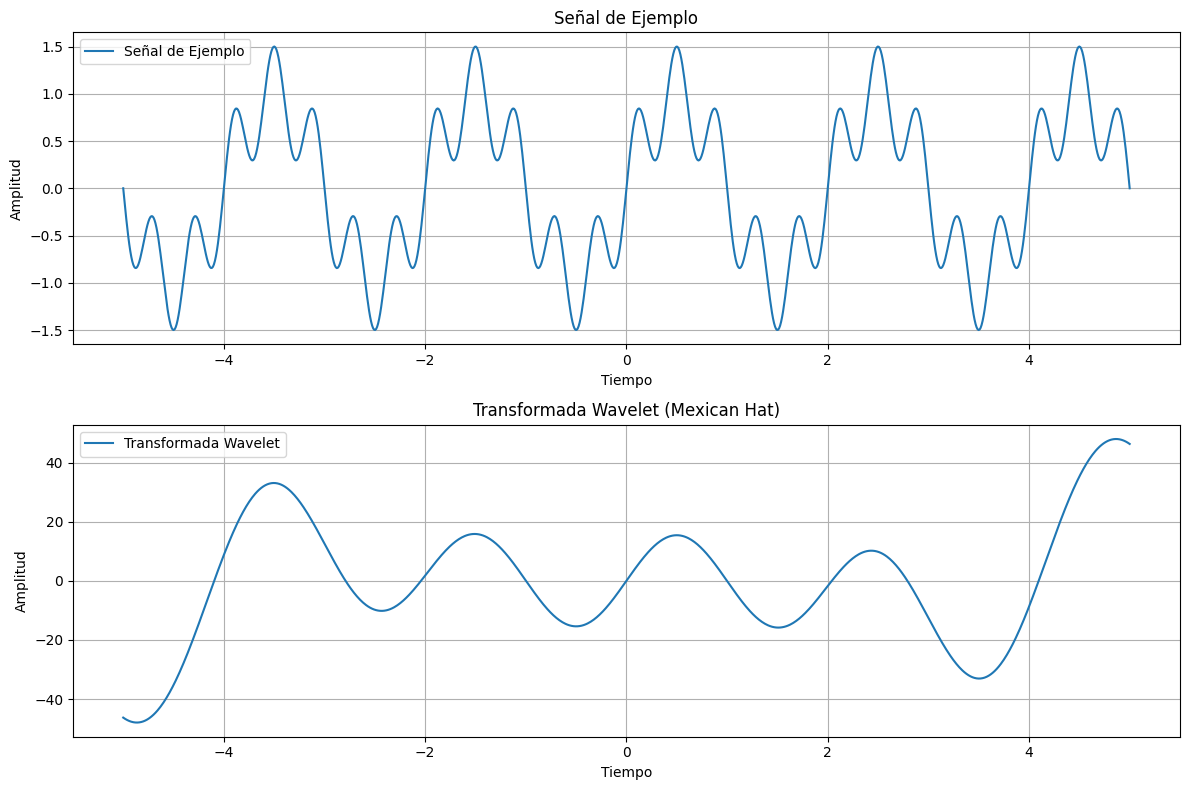

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    return (2 / (np.sqrt(3 * sigma) * np.pi**0.25)) * (1 - (x - mu)**2 / sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Se define la señal de ejemplo
t = np.linspace(-5, 5, 1000)
senal_ejemplo = np.sin(2 * np.pi * 0.5 * t) + 0.5 * np.sin(2 * np.pi * 2.5 * t)

# Se define los parámetros de la Mexican Hat Wavelet
mu = 0
sigma = 1

# Se aplica la transformada wavelet a la señal de ejemplo en diferentes escalas y posiciones
wavelet_transform = np.zeros_like(senal_ejemplo)
for i, x in enumerate(t):
    wavelet_transform[i] = np.sum(senal_ejemplo * mexican_hat(t - x, mu, sigma))

# Se grafica la señal de ejemplo y su transformada wavelet
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, senal_ejemplo, label='Señal de Ejemplo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal de Ejemplo')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, wavelet_transform, label='Transformada Wavelet')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Transformada Wavelet (Mexican Hat)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

1. "psi_mn(psi, m, n)": Esta función calcula la wavelet escalada y trasladada para una wavelet psi, un valor de escala (m) y un valor de traslación (n). Además, utiliza la fórmula de escala y traslación de la wavelet, donde "a" representa la escala y "b" la traslación.
2. "a = 2**m y b = n*2**m": Esta ecuación calcula los factores de escala y traslación.
3. "wav = np.zeros(len(psi)*a + b)": Crea un arreglo de ceros de longitud suficiente para contener la wavelet escalada y trasladada.
4. Por último, el bucle for posterior itera sobre diferentes valores de escala (m) y dibuja las wavelets escaladas y trasladadas correspondientes para cada valor de traslación (n).
5. Finalmente, se muestra el gráfico que representa las wavelets escaladas y trasladadas para los diferentes valores de escala y traslación. Cada subgráfico corresponde a un valor específico de m, y en cada subgráfico se muestran las wavelets correspondientes para diferentes valores de n.

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


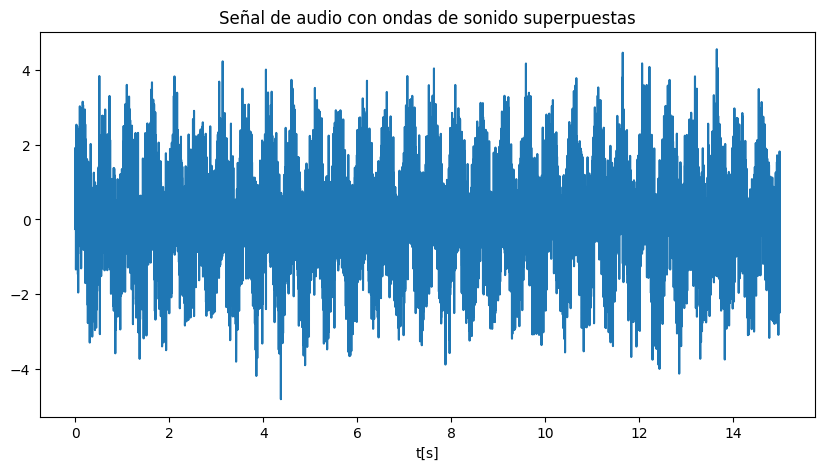

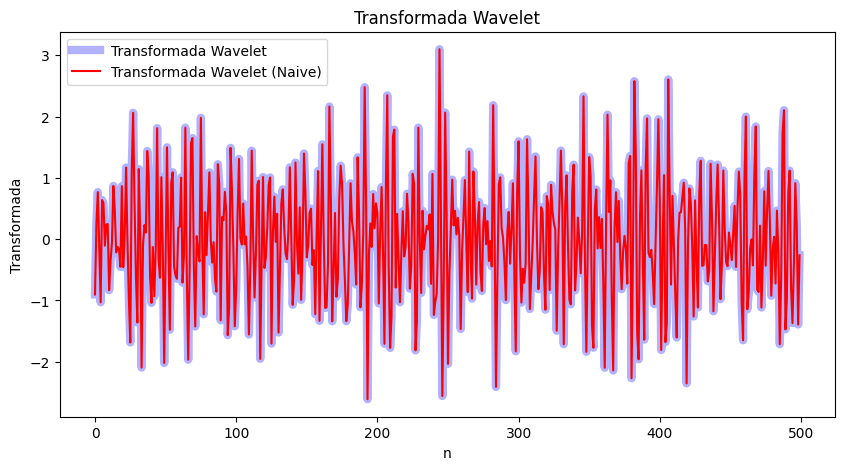

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Se define la función de onda wavelet
def mexican_hat(x):
    return (2 / (np.sqrt(3) * np.pi**0.25)) * (1 - x**2) * np.exp(-0.5 * x**2)

# Función para calcular la wavelet escalada y trasladada
def psi_mn(psi, m, n):
    a_0 = 2
    b_0 = 1
    a = a_0**m
    b = n * b_0 * a_0**m
    return a_0**(-m/2) * psi(a_0**-m * x - n * b_0)

# Transformada wavelet considerando la suma sobre la sección bajo estudio
def twav_mn(f, psi, m, n):
    pmn = psi_mn(psi, m, n)      # Wavelet escalada y trasladada
    transform = np.sum(f * pmn)  # Transformada wavelet
    return transform

# Transformada wavelet de manera ingenua añadiendo sobre toda la longitud
def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)      # Wavelet escalada y trasladada
    transform = np.sum(f * pmn)  # Transformada wavelet
    return transform

# Valores para la escala y la traslación
m = 3
ns = np.arange(1000, 1500)
res = 1000  # Resolución
freq = 2  # Frecuencia

# Creación de una señal de audio para analizar
x = np.arange(0, 15000, 1)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(np.arange(15000) * 2 * np.pi * freq / res) + noise

# Se cálcula de la transformada wavelet para cada valor de n
transformed_sweept = [twav_mn(audio, mexican_hat, m, n) for n in ns]
naive_transformed_sweept = [twav_mn_naive(audio, mexican_hat, m, n) for n in ns]

# Se gráfica de la señal de audio
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t[s]")
plt.title("Señal de audio con ondas de sonido superpuestas")
plt.show()

# Se gráfica de la transformada wavelet
plt.figure(figsize=(10, 5))
plt.plot(transformed_sweept, color="blue", lw=6, alpha=0.3, label='Transformada Wavelet')
plt.plot(naive_transformed_sweept, "r-", label='Transformada Wavelet (Naive)')
plt.xlabel("n")
plt.ylabel("Transformada")
plt.title("Transformada Wavelet")
plt.legend()
plt.show()


### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

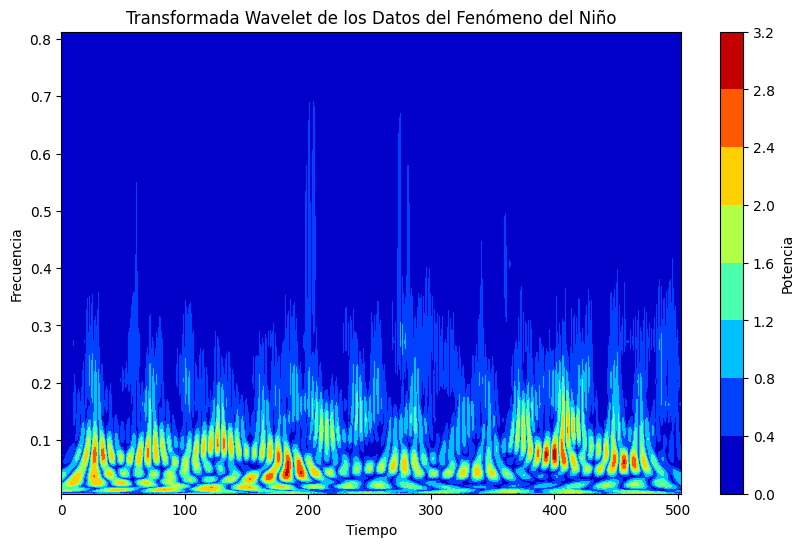

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Se descargan los datos del fenómeno del Niño desde la URL
url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
data = np.loadtxt(url)

# Parámetros para la transformada continua
scales = np.arange(1, 128)  # Escalas a utilizar
wavelet = 'morl'  # Tipo de wavelet a utilizar

# Se aplica la transformada continua
coeficientes, frecuencias = pywt.cwt(data, scales, wavelet)

# Se alcula la potencia de los coeficientes
potencia = (np.abs(coeficientes)) ** 0.8

# Se grafica el resultado en términos de potencia
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(data)), frecuencias, potencia, cmap='jet')
plt.colorbar(label='Potencia')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Transformada Wavelet de los Datos del Fenómeno del Niño')
plt.show()


### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico obtenido muestra la potencia de los coeficientes de la transformada wavelet en función del tiempo y la frecuencia. Esta representación nos proporciona información sobre las características periódicas presentes en los datos del fenómeno del Niño. En el eje y del gráfico, se representa la frecuencia de las variaciones presentes en los datos. Una alta potencia en una frecuencia particular indica que esa frecuencia contribuye significativamente a la señal original. Por lo tanto, los picos en el eje y indican las frecuencias dominantes presentes en los datos. En el eje x del gráfico, se representa el tiempo o el índice de los datos. Esto permite ver cómo estas frecuencias dominantes varían a lo largo del tiempo. Si hay estructuras horizontales prominentes en el gráfico, indican que ciertas frecuencias son importantes durante períodos específicos de tiempo.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/